In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Ploting Different Polling Methods

Text(0.5,0,'Methodolgy')

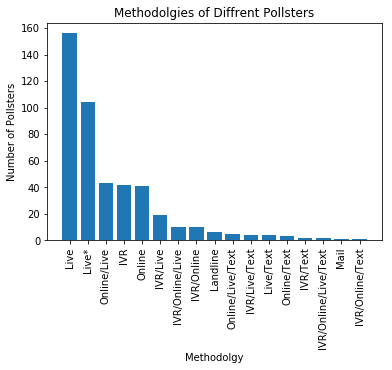

In [3]:
pollster_rating = pd.read_csv("pollster-ratings.csv")
Methodologies_frequencies = pollster_rating.Methodology.value_counts()
plt.bar(Methodologies_frequencies.index, Methodologies_frequencies)
plt.xticks(rotation = "vertical")
plt.title("Methodolgies of Diffrent Pollsters")
plt.ylabel("Number of Pollsters")
plt.xlabel("Methodolgy")

## Plotting Poll Size Distribution

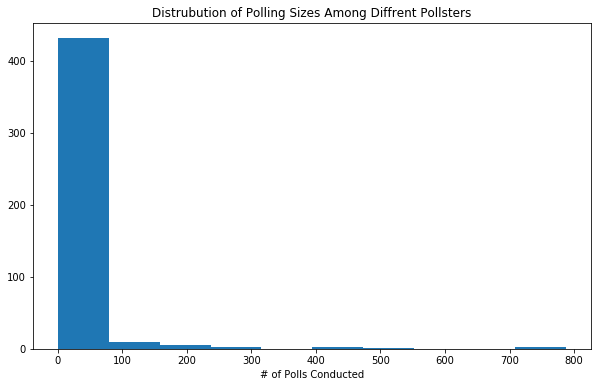

In [34]:
plt.figure(figsize = (10,6))
plt.hist(pollster_rating['# of Polls'])
plt.title("Distrubution of Polling Sizes Among Diffrent Pollsters")
plt.xlabel("# of Polls Conducted")
plt.show()

## Accuracy  of Pollsters

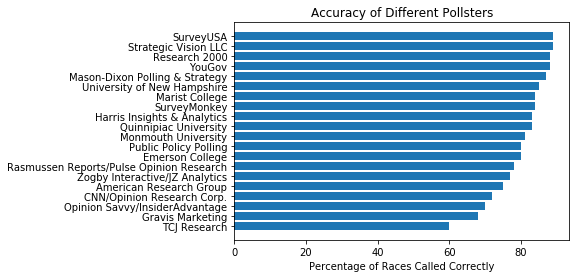

In [114]:
#selects only Pollsters with 100+ Polls
frequent_pollsters = pollster_rating[pollster_rating['# of Polls'] > 100]
frequent_pollsters = frequent_pollsters.set_index('Pollster')

#Reformats Races Called Correclty Data so it ban be sorted
Races_called_correctly = frequent_pollsters['Races Called Correctly'].str.rstrip('%').astype(int)
Races_called_correctly = Races_called_correctly.sort_values()

#makes Bar graph
plt.figure(figsize = (6,4))
plt.barh(Races_called_correctly.index, Races_called_correctly)
plt.title("Accuracy of Different Pollsters")
plt.xlabel("Percentage of Races Called Correctly")
plt.show()

## Are More Frequent Pollsters More Accurate?

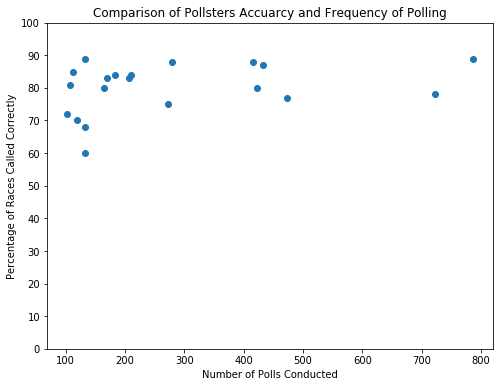

In [12]:
pollster_above_10 = pollster_rating[pollster_rating['# of Polls'] > 100]
plt.figure(figsize = (8,6))
x_list = pollster_above_10['# of Polls']
y_list = pollster_above_10['Races Called Correctly'].str.rstrip('%').astype(int)
plt.scatter(x_list, y_list)
plt.yticks(np.arange(0, 110, 10))
plt.title("Comparison of Pollsters Accuarcy and Frequency of Polling")
plt.xlabel("Number of Polls Conducted")
plt.ylabel("Percentage of Races Called Correctly")
plt.show()

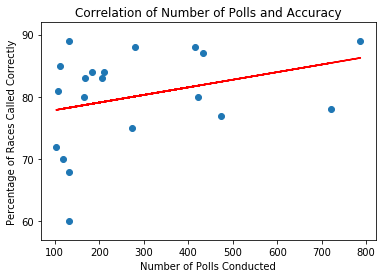

R squared: 0.10000050740109898


In [13]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x_list, y_list)

predictions = slope * x_list + intercept
plt.yticks(np.arange(0, 110, 10))
plt.title("Correlation of Number of Polls and Accuracy")
plt.xlabel("Number of Polls Conducted")
plt.ylabel("Percentage of Races Called Correctly")
plt.scatter(x_list, y_list)
plt.plot(x_list, predictions, color = 'r')
plt.show()
print "R squared:", r_value ** 2